# Mitigation Performance vs. Qubit Count and Shots
Explore ZNE, PEC, and LRE across different numbers of logical qubits
and varying shot counts, at a fixed shallow depth.

In [1]:
import numpy as np
import qiskit
import matplotlib.pyplot as plt
from functools import partial

from backend_utils_1 import execute as full_execute
from mitiq_utils_2 import run_experiment
from results_utils import plot_depth_comparison, plot_heatmap

plt.rcParams.update({'font.family':'serif','font.size':12})


In [8]:
# Sweep parameters
qubit_list = [2, 3, 10, 15]             # logical qubit counts
shots_list = [1000, 5000, 10000]      # total shots per circuit
depth = 3                             # shallow depth for testing
seeds = [0, 1]                        # seeds for averaging

backend_name = 'FakeLimaV2'
use_ideal = False

methods = ['zne', 'pec', 'lre']


In [9]:
# Container for results: method -> qubits x shots
results = {m: np.zeros((len(qubit_list), len(shots_list))) for m in methods}

for i, q in enumerate(qubit_list):
    for j, shots in enumerate(shots_list):
        # define executor for current q, shots
        executor = partial(
            full_execute,
            shots=shots,
            correct_bitstring='0'*q,
            verbose=False
        )
        for m in methods:
            vals = []
            for s in seeds:
                val = run_experiment(
                    method=m,
                    executor=executor,
                    circuit_type='mirror',
                    n_qubits=q,
                    depth=depth,
                    seed=s,
                    backend_name=backend_name,
                    use_ideal=use_ideal,
                    scale_factors=[1.0,2.0,3.0],
                    pec_num_samples=20,
                    lre_degree=1,
                    lre_fold=2.0,
                    random_state=s
                )
                vals.append(val)
            results[m][i, j] = np.mean(vals)
results


c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_0: ───X^-0.5───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_1: ───Ry(-0.5π)───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_0: ───Y───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_1: ───X^0.5───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_1: ───X───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 

q_0: ───I───.
  warnings.warn(
c:\Users\Roy\Phys522\.venv\Lib\site-packages\mitiq\pec\sampling.py:75: UserWarning: No representation found for 


CircuitTooWideForTarget: 'Number of qubits (10) in circuit-17406 is greater than maximum (5) in the coupling_map'

## Expectation vs. Shots for Each Qubit Count

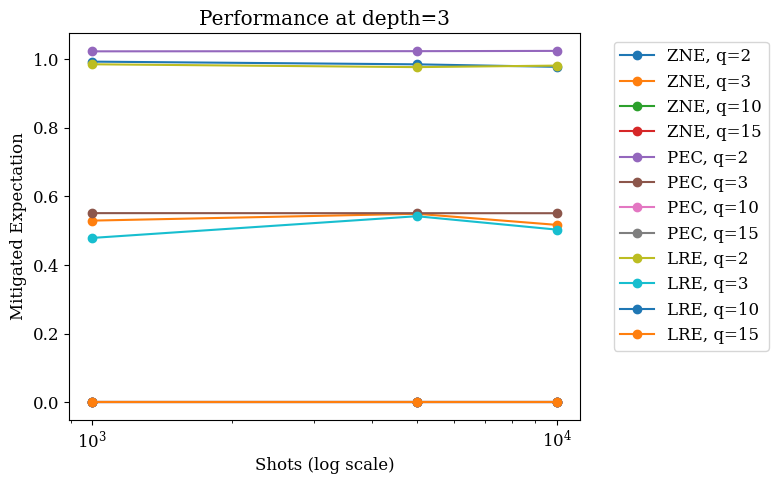

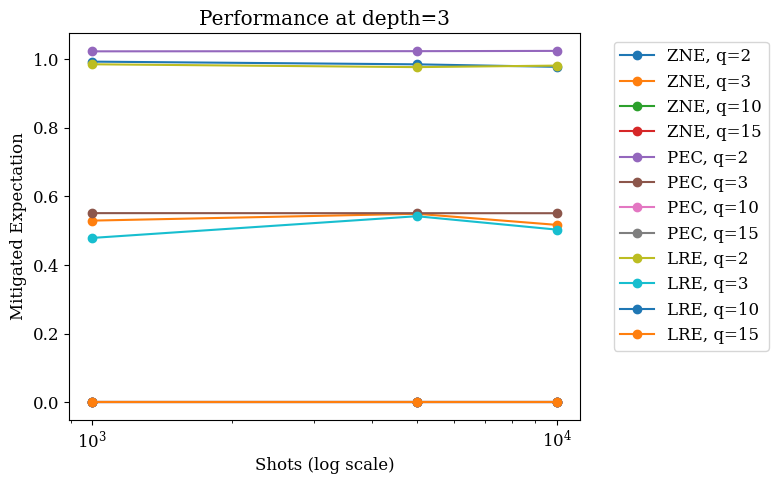

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
for m in methods:
    for i, q in enumerate(qubit_list):
        ax.plot(shots_list, results[m][i], marker='o', label=f"{m.upper()}, q={q}")
ax.set_xscale('log')
ax.set_xlabel('Shots (log scale)')
ax.set_ylabel('Mitigated Expectation')
ax.set_title(f'Performance at depth={depth}')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig


## Heatmaps: Qubit Count vs. Shots

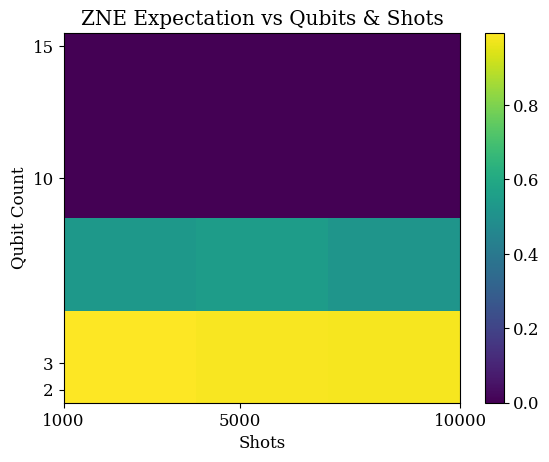

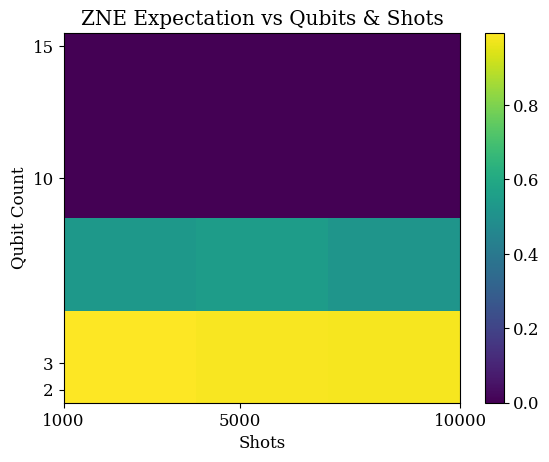

In [11]:
# Heatmap for ZNE
fig_zne = plot_heatmap(
    results['zne'],
    x_labels=shots_list,
    y_labels=qubit_list,
    title="ZNE Expectation vs Qubits & Shots",
    xlabel="Shots",
    ylabel="Qubit Count",
    origin="lower"
)
fig_zne


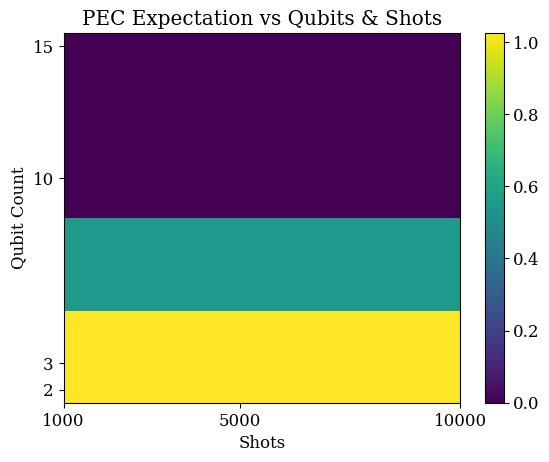

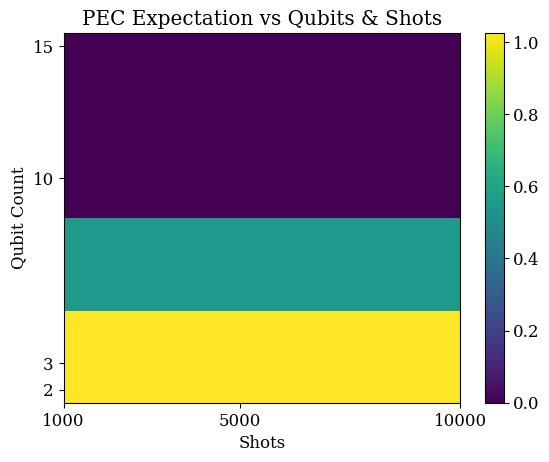

In [12]:
# Heatmap for PEC
fig_pec = plot_heatmap(
    results['pec'],
    x_labels=shots_list,
    y_labels=qubit_list,
    title="PEC Expectation vs Qubits & Shots",
    xlabel="Shots",
    ylabel="Qubit Count",
    origin="lower"
)
fig_pec


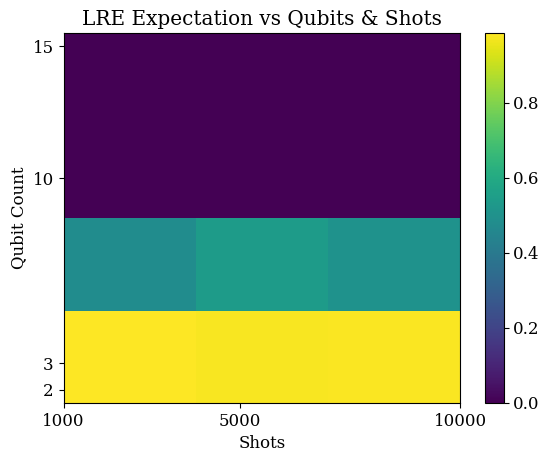

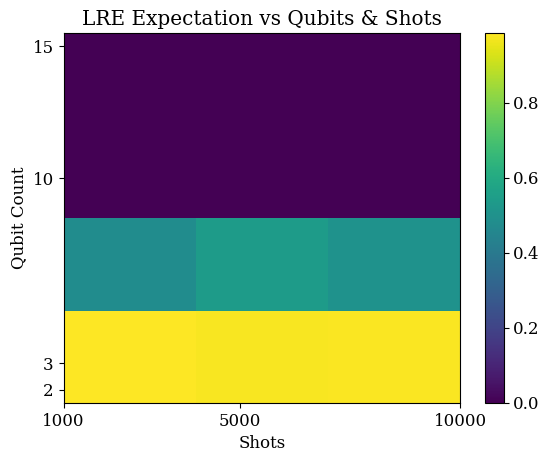

In [13]:
# Heatmap for LRE
fig_lre = plot_heatmap(
    results['lre'],
    x_labels=shots_list,
    y_labels=qubit_list,
    title="LRE Expectation vs Qubits & Shots",
    xlabel="Shots",
    ylabel="Qubit Count",
    origin="lower"
)
fig_lre


## Conclusions
- ZNE: expectation trends with increased shots and qubits.
- PEC: sampling cost vs mitigation trade-offs.
- LRE: stability across qubit counts.
- Use these plots to guide shot allocation and qubit scaling decisions.
